# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Importar datos del nuevo csv con datos limpios


In [10]:
path = "../DataSets/Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")

In [11]:
energia_df


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
496769,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


In [12]:
energia_fuente = energia_df['ENERGY SOURCE'].unique()
energia_fuente


array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

In [13]:
SATE_GENERATION_DF = energia_df.groupby(by=['STATE'])['GENERATION'].sum().sort_values()

SATE_GENERATION_DF


STATE
DC          1.016731e+07
VT          4.190779e+08
AK          5.566030e+08
DE          5.870671e+08
RI          6.138788e+08
SD          8.839361e+08
HI          9.014651e+08
ID          1.211589e+09
ME          1.289788e+09
NH          1.695082e+09
MT          2.361308e+09
NM          2.987952e+09
NE          2.993843e+09
CT          2.994237e+09
ND          3.059919e+09
MA          3.081018e+09
NV          3.134809e+09
UT          3.450059e+09
MD          3.694049e+09
WY          3.951874e+09
KS          4.161406e+09
CO          4.451068e+09
IA          4.585296e+09
MS          4.659175e+09
MN          4.721861e+09
OR          4.878831e+09
AR          4.893653e+09
WI          5.376100e+09
NJ          5.567687e+09
OK          6.256690e+09
WV          6.772590e+09
VA          6.932382e+09
TN          7.331872e+09
MO          7.358833e+09
KY          7.492254e+09
SC          8.421801e+09
LA          8.435201e+09
AZ          9.197116e+09
WA          9.291493e+09
MI          9.62495

In [14]:
energyYear2020 = energia_df.loc[(energia_df['ENERGY SOURCE'] == 'Coal') &(energia_df['YEAR'] == 2001)]

energyYear2020[['GENERATION']].sum()
#print(energyYear2020)

energy_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal']


years = [2001+i for i in range(22)]
#years

acumulados = pd.DataFrame(columns = ['Año','Fuente','Total'])

# para cado año se van a calcular la producion total de cada fuente de energía
for i in years:

       for j in energy_sources:
              # se crea un data frame temporal filtrado por fuente de energia y año
              # a nuestro data frame de acumulados se le va a agregar una fila que contenga  añ, fuente, acumulado
              temp = energia_df.loc[(energia_df['ENERGY SOURCE'] == j) &(energia_df['YEAR'] == i)]
              acumulados.loc[len(acumulados.index)] = [i,j,temp['GENERATION'].sum()]

acumulados




GENERATION    7.615824e+09
dtype: float64

,Año,Fuente,Total
0,2001,Coal,7.615824e+09
1,2001,Petroleum,4.995209e+08
2,2001,Natural Gas,2.556516e+09
3,2001,Hydroelectric Conventional,8.678442e+08
4,2001,Wind,2.694933e+07
...,...,...,...
281,2022,Other Biomass,2.831480e+07
282,2022,Other,1.902484e+07
283,2022,Solar Thermal and Photovoltaic,2.309289e+08
284,2022,Pumped Storage,-7.820192e+06


In [15]:
columnas = ['Año'] + energy_sources

acumulados = pd.DataFrame(columns = columnas)
acumulados_relativos = pd.DataFrame(columns = columnas)

for i in years:
    
    temp = energia_df.loc[(energia_df['YEAR'] == i)]
    lista = [str(i)]
    lista2 = [str(i)]



    for j in energy_sources:
        #Este ciclo acumula la energia producida segun la fuente de energiapara cada año
        

        temp2 = temp.loc[(temp['ENERGY SOURCE'] == j)]
        lista.append(temp2['GENERATION'].sum())
  
    #Suma de toda la energia producida por año'''    
    suma = sum(lista[1:len(lista)])

    for k in lista[1:]:
        
        #Se añade a la segunda lista la división de cada dato entre la suma total para obtener porcentajes
        
        lista2.append(float(k/suma))
    
    acumulados.loc[len(acumulados.index)] = lista
    acumulados_relativos.loc[len(acumulados_relativos.index)] = lista2



acumulados = acumulados.set_index('Año')
acumulados_relativos = acumulados_relativos.set_index('Año')

acumulados
acumulados_relativos

# Quitar notacion cientifica



,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Pumped Storage,Geothermal
Año,,,,,,,,,,,,,
2001,7.615824e+09,4.995209e+08,2.556516e+09,8.678442e+08,2.694933e+07,36157892.00,3.075305e+09,1.407996e+08,58192597.00,47625387.00,2.171020e+06,-35293780.00,54962004.00
2002,7.732521e+09,3.782696e+08,2.764023e+09,1.057315e+09,4.141711e+07,45850741.00,3.120256e+09,1.546602e+08,60174860.00,54107645.00,2.219324e+06,-34971714.00,57965243.00
2003,7.894947e+09,4.776226e+08,2.599630e+09,1.103225e+09,4.474987e+07,62400086.00,3.054931e+09,1.501164e+08,63248009.00,56178049.00,2.136004e+06,-34140260.00,57696920.00
2004,7.913202e+09,4.845803e+08,2.840400e+09,1.073669e+09,5.657498e+07,61009705.00,3.154114e+09,1.524675e+08,61682301.00,56929637.00,2.300628e+06,-33952840.00,59243898.00
2005,8.051492e+09,4.889001e+08,3.043841e+09,1.081285e+09,7.124221e+07,53856592.00,3.127945e+09,1.554257e+08,61681589.00,51284219.00,2.201173e+06,-26231150.00,58766978.00
2006,7.962045e+09,2.566657e+08,3.265763e+09,1.156986e+09,1.063566e+08,56707221.00,3.148875e+09,1.550484e+08,64394129.00,51897603.00,2.030816e+06,-26231368.00,58272114.00
2007,8.065822e+09,2.629559e+08,3.586359e+09,9.900399e+08,1.377997e+08,53813418.00,3.225699e+09,1.560561e+08,66098215.00,48924540.00,2.447170e+06,-27585408.00,58548852.00
2008,7.943205e+09,1.849704e+08,3.531922e+09,1.019326e+09,2.214524e+08,46827494.00,3.224834e+09,1.491994e+08,70935046.00,47214652.00,3.457256e+06,-25152248.00,59359904.00
2009,7.023617e+09,1.557461e+08,3.683915e+09,1.093780e+09,2.955445e+08,42528438.00,3.195418e+09,1.442006e+08,73770406.00,47713342.00,3.564716e+06,-18509380.00,60034634.00


,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Pumped Storage,Geothermal
Año,,,,,,,,,,,,,
2001,0.509536,0.033420,0.171044,0.058063,0.001803,0.002419,0.205753,0.009420,0.003893,0.003186,0.000145,-0.002361,0.003677
2002,0.501012,0.024509,0.179089,0.068506,0.002684,0.002971,0.202170,0.010021,0.003899,0.003506,0.000144,-0.002266,0.003756
2003,0.508278,0.030749,0.167365,0.071026,0.002881,0.004017,0.196677,0.009665,0.004072,0.003617,0.000138,-0.002198,0.003715
2004,0.498243,0.030511,0.178841,0.067602,0.003562,0.003841,0.198594,0.009600,0.003884,0.003584,0.000145,-0.002138,0.003730
2005,0.496341,0.030139,0.187640,0.066657,0.004392,0.003320,0.192825,0.009581,0.003802,0.003161,0.000136,-0.001617,0.003623
2006,0.489707,0.015786,0.200861,0.071161,0.006541,0.003488,0.193672,0.009536,0.003961,0.003192,0.000125,-0.001613,0.003584
2007,0.485105,0.015815,0.215695,0.059544,0.008288,0.003237,0.194004,0.009386,0.003975,0.002942,0.000147,-0.001659,0.003521
2008,0.482062,0.011226,0.214348,0.061861,0.013440,0.002842,0.195711,0.009055,0.004305,0.002865,0.000210,-0.001526,0.003602
2009,0.444495,0.009857,0.233140,0.069221,0.018704,0.002691,0.202225,0.009126,0.004669,0.003020,0.000226,-0.001171,0.003799


## Correccion 5
Cambiar la forma en la que se consigue la informacion necesaria


In [16]:
something = energia_df.pivot_table(values="GENERATION", index=['YEAR'], columns=['ENERGY SOURCE'], aggfunc='sum')
something

ENERGY SOURCE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels
YEAR,,,,,,,,,,,,,,
2001,7.615824e+09,54962004.00,8.678442e+08,2.556516e+09,3.075305e+09,47625387.00,58192597.00,36157892.00,4.995209e+08,-35293780.00,2.171020e+06,1.494657e+10,2.694933e+07,1.407996e+08
2002,7.732521e+09,57965243.00,1.057315e+09,2.764023e+09,3.120256e+09,54107645.00,60174860.00,45850741.00,3.782696e+08,-34971714.00,2.219324e+06,1.543381e+10,4.141711e+07,1.546602e+08
2003,7.894947e+09,57696920.00,1.103225e+09,2.599630e+09,3.054931e+09,56178049.00,63248009.00,62400086.00,4.776226e+08,-34140260.00,2.136004e+06,1.553274e+10,4.474987e+07,1.501164e+08
2004,7.913202e+09,59243898.00,1.073669e+09,2.840400e+09,3.154114e+09,56929637.00,61682301.00,61009705.00,4.845803e+08,-33952840.00,2.300628e+06,1.588222e+10,5.657498e+07,1.524675e+08
2005,8.051492e+09,58766978.00,1.081285e+09,3.043841e+09,3.127945e+09,51284219.00,61681589.00,53856592.00,4.889001e+08,-26231150.00,2.201173e+06,1.622169e+10,7.124221e+07,1.554257e+08
2006,7.962045e+09,58272114.00,1.156986e+09,3.265763e+09,3.148875e+09,51897603.00,64394129.00,56707221.00,2.566657e+08,-26231368.00,2.030816e+06,1.625881e+10,1.063566e+08,1.550484e+08
2007,8.065822e+09,58548852.00,9.900399e+08,3.586359e+09,3.225699e+09,48924540.00,66098215.00,53813418.00,2.629559e+08,-27585408.00,2.447170e+06,1.662698e+10,1.377997e+08,1.560561e+08
2008,7.943205e+09,59359904.00,1.019326e+09,3.531922e+09,3.224834e+09,47214652.00,70935046.00,46827494.00,1.849704e+08,-25152248.00,3.457256e+06,1.647755e+10,2.214524e+08,1.491994e+08
2009,7.023617e+09,60034634.00,1.093780e+09,3.683915e+09,3.195418e+09,47713342.00,73770406.00,42528438.00,1.557461e+08,-18509380.00,3.564716e+06,1.580132e+10,2.955445e+08,1.442006e+08


<AxesSubplot:xlabel='Año'>

Text(0.5, 1.0, 'Energia producida por fuente')

Text(0.5, 0, 'Año')

Text(0, 0.5, 'Energia Producida')

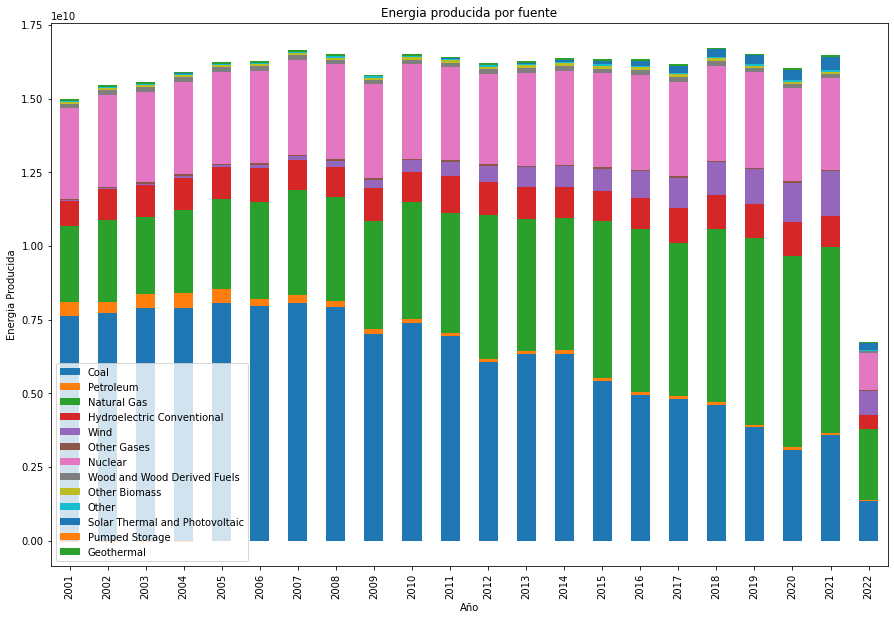

In [17]:
# Choose columns in the order to "stack" them
from operator import index

acumulados.plot(
    kind="bar",
    stacked=True,
    figsize=(15,10)
    )
    
plt.title("Energia producida por fuente")
plt.xlabel("Año")
plt.ylabel("Energia Producida")



<AxesSubplot:xlabel='Año'>

Text(0.5, 1.0, 'Energia producida por fuente')

Text(0.5, 0, 'Año')

Text(0, 0.5, 'Energia Producida')

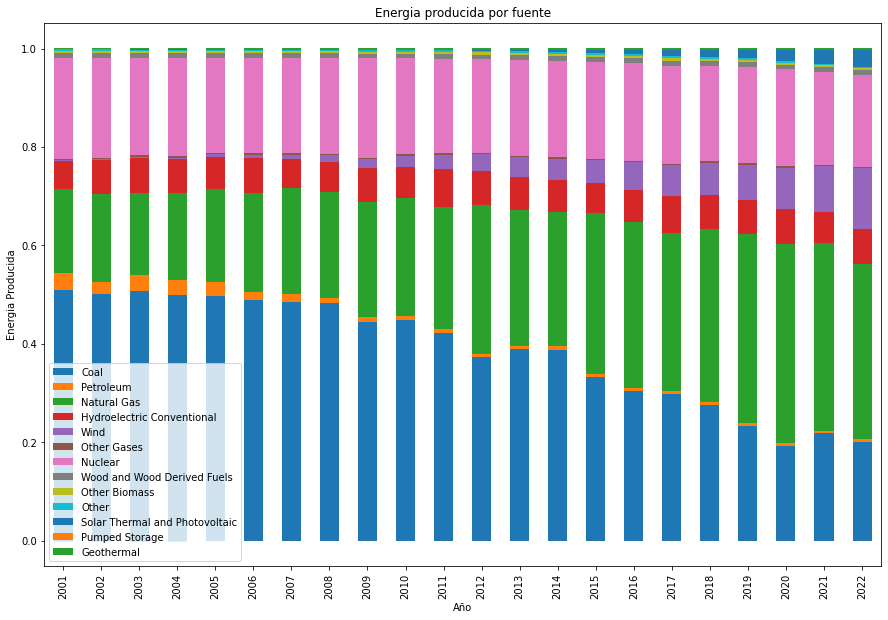

In [18]:
acumulados_relativos.plot(
    kind="bar",
    stacked=True,
    figsize=(15,10)
    )
    
plt.title("Energia producida por fuente")
plt.xlabel("Año")
plt.ylabel("Energia Producida")


pandas.core.series.Series

LabelEncoder()

<AxesSubplot:xlabel='y'>

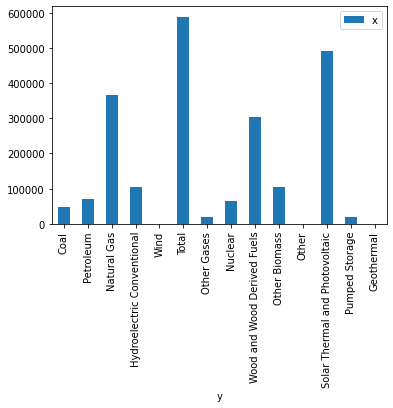

In [19]:
generation_source = energia_df['GENERATION']
# generation_source
type(generation_source)
TEPI = energia_df.loc[energia_df['GENERATION'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(generation_source)

# list(le.classes_)

numeric_generation_source = le.transform(generation_source)
#np.sort(numeric_generation_source)

energy_sr = energia_df['ENERGY SOURCE'].unique()
# energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':generation_source[:14], 'y': energy_sr[:14]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')

## Relaciones entre variables


### Energia total generada (GENERATION) por tipo de productor (TYPE OF PRODUCER)

In [20]:

tipoDeProductor = energia_df.rename(columns={"TYPE OF PRODUCER": "tipoProductor"})
arrTipoProductor = tipoDeProductor.tipoProductor.unique()

# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
tipoDeProductor.drop(['register_id', 'YEAR', 'MONTH', 'STATE', 'ENERGY SOURCE'], axis=1)

# dict para crear el dataframe
d={"tipoProductor":[], "generacion":[]}

for productor in arrTipoProductor:
    ## Obtener las filas que tengan el Total Electric Power industry
    typeProducerAll = tipoDeProductor.loc[(tipoDeProductor["tipoProductor"] == productor)]

    totalGeneracion = typeProducerAll[['GENERATION']].sum()

    d["tipoProductor"].append(productor)
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneracionProductores = pd.DataFrame(data=d)
TotalGeneracionProductores


KeyError: "['register_id'] not found in axis"

### Analisis Bivariado de TYPE OF PRODUCER y GENERATION

<AxesSubplot:title={'center':'Energia total producida por tipo de productor'}, xlabel='tipoProductor'>

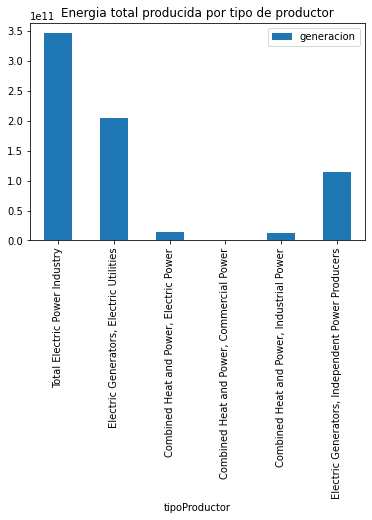

In [ ]:
TotalGeneracionProductores.plot(x='tipoProductor', y="generacion", kind='bar', title="Energia total producida por tipo de productor")

### Energia total producida por mes (MONTH)

In [ ]:
# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
energiaProducidaPorMes = energia_df.drop(['register_id', 'YEAR', 'STATE', 'ENERGY SOURCE', 'TYPE OF PRODUCER'], axis=1)

# dict para nombre de los meses
mesD = {
    1:"Enero", 2:"Febrero", 3:"Mazro", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"
}

# dict para crear el dataframe
d={"mes":[], "generacion":[]}

for mes in range(1, 13):
    ## Obtener las filas que tengan el Total Electric Power industry
    mesTotal = energiaProducidaPorMes.loc[(tipoDeProductor["MONTH"] == mes)]

    totalGeneracion = mesTotal[['GENERATION']].sum()
    d["mes"].append(mesD[mes])
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneradoPorMes = pd.DataFrame(data=d)
TotalGeneradoPorMes

,mes,generacion
0,Enero,6.188924e+10
1,Febrero,5.475369e+10
2,Mazro,5.559682e+10
3,Abril,5.175025e+10
4,Mayo,5.670889e+10
5,Junio,6.009993e+10
6,Julio,6.678387e+10
7,Agosto,6.630630e+10
8,Septiembre,5.708073e+10
9,Octubre,5.277605e+10


<AxesSubplot:xlabel='mes'>

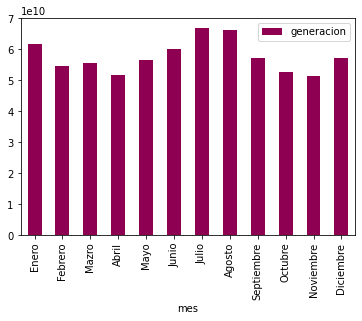

In [ ]:
TotalGeneradoPorMes.plot(x="mes",kind="bar", colormap="PiYG")

### Energia total generada por Año

In [ ]:
# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
energiaProducidaPorYear = energia_df.drop(['register_id', 'MONTH', 'STATE', 'ENERGY SOURCE', 'TYPE OF PRODUCER'], axis=1)

# dict para crear el dataframe
d={"year":[], "generacion":[]}

for year in range(2001, 2023):
    ## Obtener las filas que tengan el Total Electric Power industry
    yearTotal = energiaProducidaPorYear.loc[(tipoDeProductor["YEAR"] == year)]

    totalGeneracion = yearTotal[['GENERATION']].sum()
    d["year"].append(year)
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneradoPorYear = pd.DataFrame(data=d)
TotalGeneradoPorYear

,year,generacion
0,2001,2.989315e+10
1,2002,3.086762e+10
2,2003,3.106548e+10
3,2004,3.176444e+10
4,2005,3.244338e+10
5,2006,3.251762e+10
6,2007,3.325396e+10
7,2008,3.295510e+10
8,2009,3.160265e+10
9,2010,3.300048e+10


<AxesSubplot:xlabel='year'>

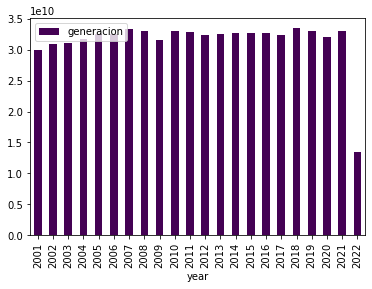

In [ ]:
TotalGeneradoPorYear.plot(x="year",kind="bar", colormap="viridis")

### Tipo de productor x Fuente de energia

In [ ]:
dataForTheHeatmap = energia_df.filter(items=['TYPE OF PRODUCER', 'ENERGY SOURCE'])
dataForTheHeatmap.rename(columns={"TYPE OF PRODUCER":"tp", "ENERGY SOURCE":"es"})

## arreglo con los nombres unicos de tipo de productor y tipo de energia
arrgFuenteEnergia = dataForTheHeatmap["ENERGY SOURCE"].unique()

d = dataForTheHeatmap['ENERGY SOURCE'].value_counts()

dTipoProductorXEnergia = {}

for productor in arrTipoProductor:

    dTipoProductorXEnergia[productor] = []

    for energia in arrgFuenteEnergia:

        # obtener la interseccion entre tipo de procuctor y fuente de energia
        totalEnergy = dataForTheHeatmap.loc[(dataForTheHeatmap["TYPE OF PRODUCER"] == productor) & (dataForTheHeatmap["ENERGY SOURCE"] == energia) if not None else 1]
        if(totalEnergy.empty):
            dTipoProductorXEnergia[productor].append(0)
        else:
            t = totalEnergy.value_counts()
            dTipoProductorXEnergia[productor].append(t[0])
        
dfTipoProductorXenergia = pd.DataFrame(data=dTipoProductorXEnergia)


# # Crear un nuevo datafram con los tipos de productores en columnas y fuente de energia en las filas
# df = pd.DataFrame(columns=dataForTheHeatmap['TYPE OF PRODUCER'].unique(), index=dataForTheHeatmap['ENERGY SOURCE'].unique())
# df



,tp,es
0,Total Electric Power Industry,Coal
1,Total Electric Power Industry,Petroleum
2,Total Electric Power Industry,Natural Gas
3,Total Electric Power Industry,Hydroelectric Conventional
4,Total Electric Power Industry,Wind
...,...,...
496769,"Electric Generators, Electric Utilities",Coal
496770,"Electric Generators, Electric Utilities",Hydroelectric Conventional
496771,"Electric Generators, Electric Utilities",Natural Gas
496772,"Electric Generators, Electric Utilities",Petroleum


,Total Electric Power Industry,"Electric Generators, Electric Utilities","Combined Heat and Power, Electric Power","Combined Heat and Power, Commercial Power","Combined Heat and Power, Industrial Power","Electric Generators, Independent Power Producers"
0,12674,10262,5377,3948,9112,6269
1,13358,13041,7177,9281,10938,9381
2,12999,12209,8741,9864,11896,10975
3,12588,11115,156,2228,3635,9120
4,8927,5473,0,1840,934,8247
5,13364,13095,10253,11160,12482,13002
6,7030,1315,2850,419,5240,1358
7,8076,5226,0,0,0,3452
8,9559,3296,3653,2052,7763,4201
9,12036,5328,5544,6639,7290,9311


<AxesSubplot:>

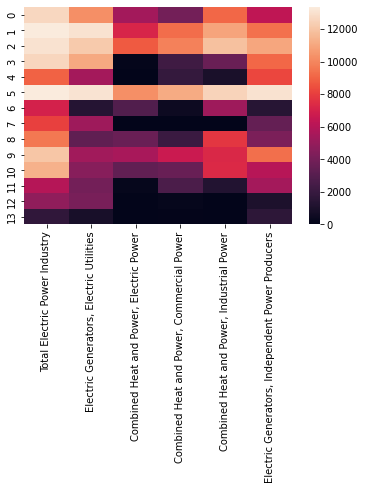

In [ ]:
sns.heatmap(dfTipoProductorXenergia)

### Tipo de productor x Years

,Total Electric Power Industry,"Electric Generators, Electric Utilities","Combined Heat and Power, Electric Power","Combined Heat and Power, Commercial Power","Combined Heat and Power, Industrial Power","Electric Generators, Independent Power Producers"
2001,5522,3932,2170,2087,3320,3181
2002,5687,4036,2367,2118,3400,3395
2003,5780,4115,2207,2100,3504,3498
2004,5856,4088,2280,2208,3528,3556
2005,5892,4068,2304,2172,3576,3576
2006,5916,4076,2304,2124,3580,3695
2007,5951,4132,2279,2255,3552,3693
2008,6188,4193,2292,2161,3619,3913
2009,6200,4196,2352,2246,3576,3968
2010,6307,4290,2310,2276,3636,4188


<AxesSubplot:>

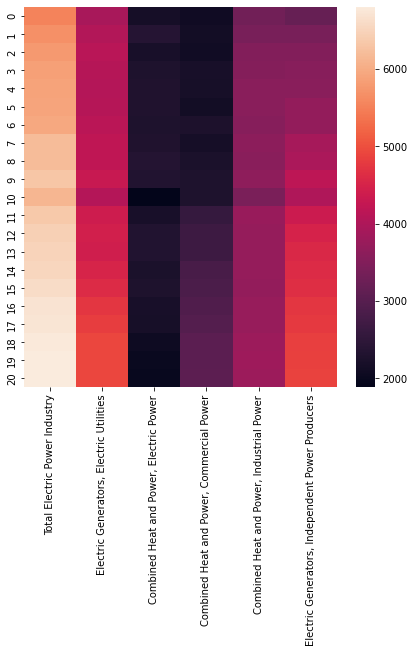

In [ ]:
dataForTheHeatmap2= energia_df.filter(items=['TYPE OF PRODUCER', 'YEAR'])

dTipoProductorXYear = {}

for productor in arrTipoProductor:

    dTipoProductorXYear[productor] = []

    for year in range(2001, 2022):

        # obtener la interseccion entre tipo de procuctor y fuente de energia
        totalEnergy = dataForTheHeatmap2.loc[(dataForTheHeatmap2["TYPE OF PRODUCER"] == productor) & (dataForTheHeatmap2["YEAR"] == year) if not None else 1]
        if(totalEnergy.empty):
            dTipoProductorXYear[productor].append(0)
        else:
            t = totalEnergy.value_counts()
            dTipoProductorXYear[productor].append(t[0])
        
dfTipoProductorXYearChido = pd.DataFrame(data=dTipoProductorXYear)
dfTipoProductorXYearChido.rename(index={key: key+2001 for key in range(0, 22)})

fig, ax = plt.subplots(figsize=(7,7))  
sns.heatmap(dfTipoProductorXYearChido)
